# K Nearest Neighbor


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import normalize, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_validate
#from sklearn import cross_validation
from sklearn.model_selection import cross_val_score

In [2]:
names=['rssi-1', 'rssi-2', 'rssi-3', 'rssi-4','rssi-5','rssi-6','rssi-7','rssi-8','rssi-9','rssi-10','rssi-11','rssi-12','rssi-13','rssi-14','rssi-15','rssi-16','rssi-17','rssi-18', 'rssi-19', 'rssi-20', 'rssi-21','rssi-22','rssi-23','rssi-24','rssi-25','rssi-26','rssi-27','rssi-28','rssi-29','rssi-30','rssi-31','rssi-32','rssi-33','rssi-34','rssi-35', 'rssi-36', 'rssi-37', 'rssi-38','rssi-39','rssi-40','rssi-41','rssi-42','rssi-43','rssi-44','rssi-45','rssi-46','rssi-47','rssi-48','rssi-49','rssi-50','rssi-51','rssi-52', 'rssi-53', 'rssi-54', 'rssi-55','rssi-56','rssi-57','rssi-58','rssi-59','rssi-60','rssi-61','rssi-62','rssi-63','rssi-64','rssi-65','rssi-66','rssi-67','rssi-68','rssi-69', 'rssi-70', 'rssi-71', 'rssi-72','rssi-73','rssi-74','rssi-75','rssi-76','rssi-77','rssi-78','rssi-79','rssi-80','rssi-81','rssi-82','rssi-83','rssi-84','rssi-85','rssi-86', 'rssi-87', 'rssi-88', 'rssi-89','rssi-90','rssi-91','rssi-92','rssi-93','rssi-94','rssi-95','rssi-96','rssi-97','rssi-98','rssi-99','rssi-100','rssi-101','rssi-102','rssi-103', 'rssi-104', 'rssi-105', 'rssi-106','rssi-107','rssi-108','rssi-109','rssi-110','rssi-111','rssi-112','rssi-113','rssi-114','rssi-115','rssi-116','rssi-117','rssi-118','rssi-119','rssi-120', 'rssi-121', 'rssi-122', 'rssi-123','rssi-124','rssi-125','rssi-126','rssi-127','zone']
data = pd.read_csv('measure1_smartphone_wifi_all.csv', names=names)
#data = pd.read_csv('measure1_smartphone_wifi_all.csv', names=names) 
#dataset.head()

In [3]:
data = data.drop('rssi-9', axis=1)
data = data.drop('rssi-10', axis=1)
data = data.drop('rssi-11', axis=1)
data = data.drop('rssi-12', axis=1)
data = data.drop('rssi-14', axis=1)
data = data.drop('rssi-15', axis=1)
data = data.drop('rssi-16', axis=1)
data = data.drop('rssi-25', axis=1)
data = data.drop('rssi-27', axis=1)
data = data.drop('rssi-62', axis=1)
data = data.drop('rssi-72', axis=1)
data = data.drop('rssi-73', axis=1)
data = data.drop('rssi-74', axis=1)
data = data.drop('rssi-81', axis=1)
data = data.drop('rssi-82', axis=1)
data = data.drop('rssi-83', axis=1)
data = data.drop('rssi-84', axis=1)
data = data.drop('rssi-85', axis=1)
data = data.drop('rssi-86', axis=1)
data = data.drop('rssi-87', axis=1)
data = data.drop('rssi-88', axis=1)
data = data.drop('rssi-89', axis=1)
data = data.drop('rssi-90', axis=1)
data = data.drop('rssi-91', axis=1)
data = data.drop('rssi-92', axis=1)
data = data.drop('rssi-93', axis=1)
data = data.drop('rssi-94', axis=1)
data = data.drop('rssi-95', axis=1)
data = data.drop('rssi-101', axis=1)
data = data.drop('rssi-109', axis=1)
data = data.drop('rssi-113', axis=1)
data = data.drop('rssi-114', axis=1)

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 95].values

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30) 

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [7]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [8]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[11  0  2 10  0  0]
 [ 6  4  1  0  0  0]
 [ 1  1 23  0  0  2]
 [ 3  2  0  7  0  0]
 [ 0  0  0  1  3  0]
 [ 0  0  5  0  0 16]]
              precision    recall  f1-score   support

   Corridor1       0.52      0.48      0.50        23
   Corridor2       0.57      0.36      0.44        11
   Corridor3       0.74      0.85      0.79        27
        Hall       0.39      0.58      0.47        12
     Office1       1.00      0.75      0.86         4
     Office2       0.89      0.76      0.82        21

    accuracy                           0.65        98
   macro avg       0.69      0.63      0.65        98
weighted avg       0.67      0.65      0.65        98



In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

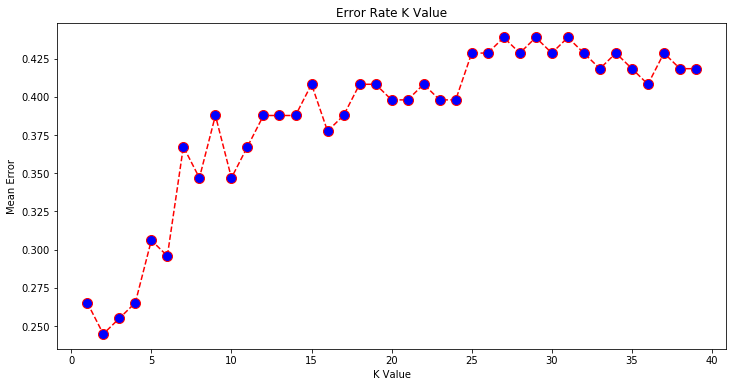

In [10]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# Accuracy

In [11]:
#converting the data to array for plotting. 
#X = np.array(data.iloc[:,0:96])
#y = np.array(data['zone'])
X = data.iloc[:, :-1].values  
y = data.iloc[:, 95].values  
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

Shape of X:(325, 95)
Shape of y:(325,)


In [12]:
# custome color maps
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

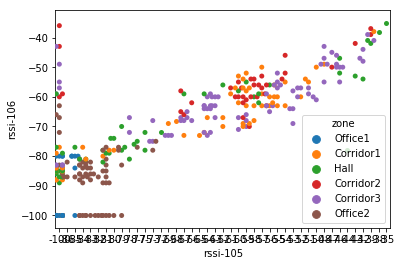

In [13]:
sns.swarmplot(x='rssi-105',y='rssi-106',data=data,hue='zone')

In [14]:
# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(243, 95)
Shape of y_Train:(243,)
Shape of X_Test:(82, 95)
Shape of y_Test:(82,)


In [15]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [16]:
# Predicting results using KNN fit. 
pred = knn.predict(X_train)
#pred

# Check accuracy
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.8806584362139918


[[43  0  1  3  0  2]
 [ 1 20  1  1  0  0]
 [ 0  1 58  0  0  2]
 [11  3  1 23  0  0]
 [ 0  0  0  0 16  0]
 [ 0  0  2  0  0 54]]


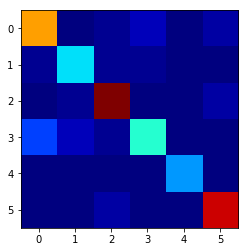

In [17]:
#computing confusion matrix 
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

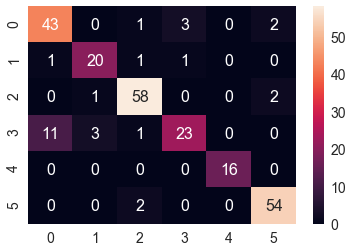

In [18]:
#visualizing the confusion matrix
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

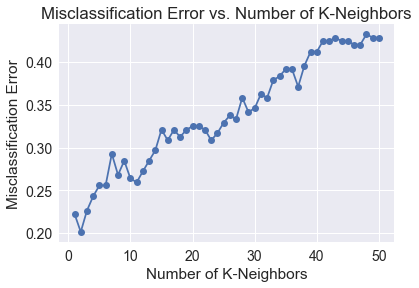

In [19]:
MSE = []
neighbors = np.arange(1,51,1)
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    avg_cv_score = scores.mean()
    MSE.append(1 - avg_cv_score.mean())
    
optimal_k = neighbors[MSE.index(min(MSE))]
plt.plot(neighbors, MSE, marker='o')
plt.title('Misclassification Error vs. Number of K-Neighbors')
plt.xlabel('Number of K-Neighbors')
plt.ylabel('Misclassification Error')
plt.show()

In [20]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, Y_train)
score =  np.round(accuracy_score(Y_test, knn.predict(X_test)) * 100, 2)
print("The success rate of classification for the hyperparameter optimization of K-Nearest Neighbors is", 
     score, "%")

The success rate of classification for the hyperparameter optimization of K-Nearest Neighbors is 80.49 %


In [21]:
print(optimal_k)

2
